<a href="https://colab.research.google.com/github/RMinutillo/intro-to-github/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Proyecto Machine Learning/BBDD_Hospitalización.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [16]:
df.head()
#df.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,...,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,ENF. CRONICA PULMONAR OBSTRUCTIVA_NO,ENF. CRONICA PULMONAR OBSTRUCTIVA_SI,"ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA","ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC"
0,53,NO,NO,4.0,0,1,0.788571,12,0,NEG,...,NO,NO,0.986667,1,2,0,1,0,0,0
1,56,NO,NO,7.7,0,1,0.788571,12,0,NEG,...,NO,NO,0.986667,1,5,0,1,0,0,0
2,57,NO,NO,29.0,1,1,0.788571,24,0,NEG,...,HEMOCULTIVO,E.COLI,0.013333,1,4,3,1,0,0,0
3,56,NO,NO,7.0,0,1,0.788571,12,0,NEG,...,NO,NO,0.986667,1,5,0,1,0,0,0
4,55,NO,NO,29.0,1,1,0.788571,24,0,NEG,...,HEMOCULTIVO,E.COLI,0.986667,1,4,3,1,0,0,0


In [ ]:
df.info()

In [6]:
columnas_a_int = ['EDAD', 'NUMERO DE MUESTRAS TOMADAS','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC']

# Convertir las columnas a tipo int y llenar los valores no numéricos con la mediana
df[columnas_a_int] = df[columnas_a_int].fillna(df[columnas_a_int].median())

# Convertir las columnas a tipo int
df[columnas_a_int] = df[columnas_a_int].astype(int)



# borramos las ultimas 2 filas que estan vacias
df = df.iloc[:-2]


In [ ]:
df.isnull().sum()

In [8]:
# remplazamos los valores NaN en las filas Int y float por la media, no es necesario borrar ninguna otra fila ya que son <2 % de faltantes
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())

# y los valores object como eran pocas filas y datos sensibles que son null los apartamos
df.dropna(inplace=True)

<ipython-input-8-6f8f6d166868>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
<ipython-input-8-6f8f6d166868>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

In [23]:
# Ver los valores unicos de cada columna para detectar outliers
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)
    print("--------------------")

# sacamos los datos donde edad es > a 105
df = df[df['EDAD'] <= 105]



Valores únicos en la columna 'EDAD':
[53 56 57 55 67 69 44 54 68 43 65 62 71 64 77 75 73 63 66 84 42 61 47 48
 49 81 52 74 70 58 59 60 50 76 78 46 51 79 39 72 80 45 82]
--------------------
Valores únicos en la columna 'DIABETES':
['NO' 'SI']
--------------------
Valores únicos en la columna 'HOSPITALIZACIÓN ULTIMO MES':
['NO' 'SI']
--------------------
Valores únicos en la columna 'PSA':
[  4.           7.7         29.           7.           6.2
   6.          13.27140071   5.7          4.3          5.19
   4.5         14.          10.           9.          91.8
  21.          98.           7.5         10.5         90.
   5.1         16.          17.          23.           6.4
 100.           5.8         25.          38.9         20.
  40.           9.5          9.6         10.2          8.5
  53.          19.           5.6          3.5         15.
   5.2         17.7          4.6          8.           8.7
   4.8          7.6         10.6          4.7         18.
  27.           5.   

In [19]:
# Tratamiento de columnas con dos valores únicos ('NO' y 'SI')
binary_columns = ['BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'FIEBRE', 'ITU', 'HOSPITALIZACION']
df[binary_columns] = df[binary_columns].replace({'NO': 0, 'SI': 1})

## Tratamiento de columnas con múltiples valores únicos utilizando codificación de frecuencia
# frequency_encode_columns = ['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'PATRON DE RESISTENCIA']
# for column in frequency_encode_columns:
#     freq_encoding = df[column].value_counts(normalize=True).to_dict()
#     df[column] = df[column].map(freq_encoding)
frequency_encode_columns = ['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'PATRON DE RESISTENCIA']
df[frequency_encode_columns] = df[frequency_encode_columns].apply(lambda x: pd.Series(np.where(x == x.value_counts().idxmax(), 1, 0)))

## Tratamiento de columnas con múltiples valores únicos utilizando One Hot Encoding
# ohe_columns = ['ENF. CRONICA PULMONAR OBSTRUCTIVA']
# df = pd.get_dummies(df, columns=ohe_columns)

# Eliminar columnas innecesarias

# Guardar el DataFrame modificado en un nuevo archivo CSV si es necesario
#df.to_csv('nuevo_archivo.csv', index=False)


In [ ]:
df.info()

<ipython-input-26-18ebad3aaa19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


                                                EDAD       PSA  \
EDAD                                        1.000000  0.188419   
PSA                                         0.188419  1.000000   
BIOPSIAS PREVIAS                           -0.089389 -0.044194   
VOLUMEN PROSTATICO                          0.264633  0.132861   
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS     0.035675 -0.013763   
NUMERO DE MUESTRAS TOMADAS                 -0.212448 -0.208583   
CUP                                         0.135643  0.088378   
FIEBRE                                     -0.009226 -0.038737   
ITU                                        -0.002406 -0.028150   
PATRON DE RESISTENCIA                       0.025471  0.054884   
HOSPITALIZACION                            -0.070429 -0.063546   
DIAS HOSPITALIZACION MQ                    -0.030693 -0.034882   
DIAS HOSPITALIZACIÓN UPC                   -0.034834  0.043437   
ENF. CRONICA PULMONAR OBSTRUCTIVA_NO       -0.112536 -0.208696   
ENF. CRONI

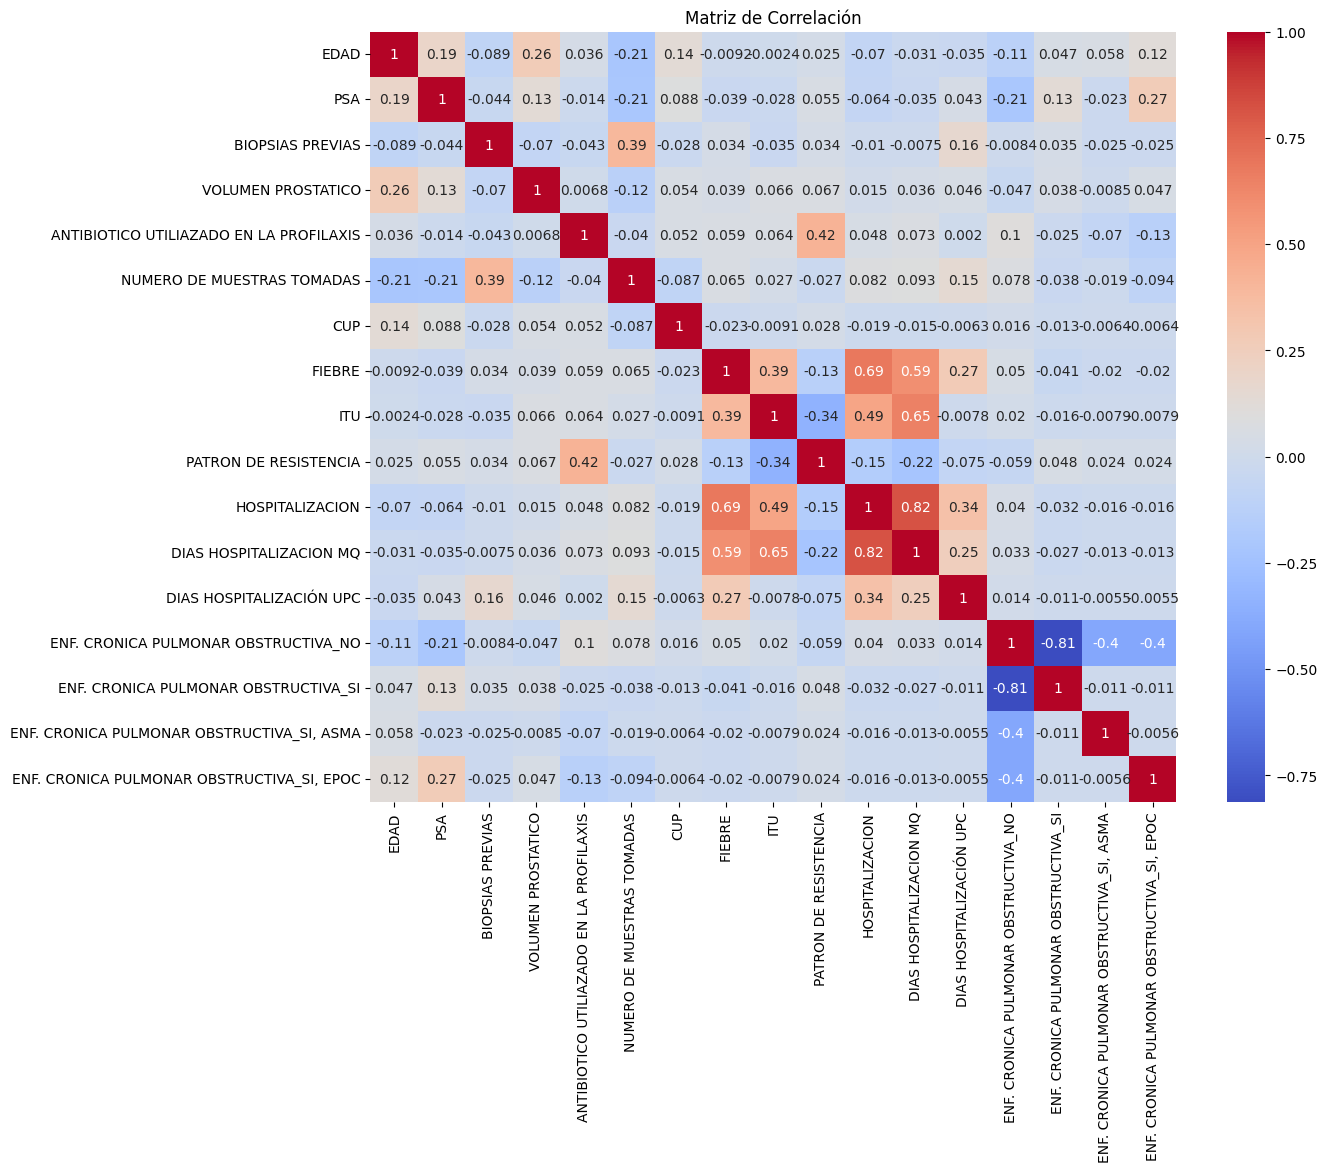

In [26]:
# vamos a ver la correlacion que hay entre las columnas del df 
matriz_correlacion = df.corr()
print(matriz_correlacion)

import seaborn as sns
import matplotlib.pyplot as plt

# visualizamos la matriz con un mapa de calor
plt.figure(figsize=(13, 10))

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
